# ONMI

Importing the neccesary libraries

In [3]:
from pathlib import Path
from scipy.io import readsav
import matplotlib.cm as cmx
from matplotlib import dates
from datetime import date
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import matplotlib

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

The data corresponds to the date interval from 01/05/1996 to 31/01/2020

In [4]:
data_dir = Path("OMNI/")
file = data_dir / "param.sav"
sav_data = readsav(file)

In [5]:
sav_data.keys()

dict_keys(['tex', 'datejul', 'mag', 'bbxx', 'bbyy', 'bbzz', 'bygsm', 'bzgsm', 'vel', 'vvxx', 'vvyy', 'vvzz', 'den', 'tem', 'betha', 'alf', 'mac', 'premag', 'predin', 'tasa', 'xxcoor', 'yycoor', 'zzcoor'])

The tex data has the next format [hour, min, sec, msec, day, month,  year] :

In [6]:
sav_data['tex'][-1]

array([  23,   59,    0,    0,    1,    8, 2019], dtype=int16)

Alternatively, this is the Julian Time:

In [7]:
sav_data['datejul'][-1]

2458697.499305556

Attempting to find the index given an specific date:

In [5]:
ts = pd.Timestamp(year = 2012,  month = 7, day = 14,  
                  hour = 0, second = 0)
jul_date = pd.Timestamp.to_julian_date(ts)
jul_date

2456122.5

In [6]:
index = next(k for k, value in enumerate(sav_data['datejul']) if value > jul_date)
print("Index is: ", index)

Index is:  8169120


In [10]:
sav_data['datejul'][index]

2456122.5000000005

Creating a function that can use the above information to plot a specific date interval:

In [7]:
def date(yyyy, mm, dd, hh, ss):
    ts = pd.Timestamp(year = yyyy, month = mm, day = dd, hour = hh, second = ss)
    jul_date = pd.Timestamp.to_julian_date(ts)
    index = next(k for k, value in enumerate(sav_data['datejul']) if value > jul_date)
    return index

In [12]:
date(2012, 7, 14, 0 , 0)

8169120

In [8]:
def gg(year1, month1, day1, hour1, second1, year2, month2, day2, hour2, second2):
    min_val = date(year1, month1, day1, hour1, second1)
    max_val = date(year2, month2, day2, hour2, second2)
    # min = init
    # max = min + interval
    T, BX, BY, BZ = (sav_data['datejul'][min_val:max_val], 
                     sav_data['bbxx'][min_val:max_val], 
                     sav_data['bbyy'][min_val:max_val], 
                     sav_data['bbzz'][min_val:max_val])

    fig, ax = plt.subplots(figsize=(17,5))
    plt.plot_date(T, BX, marker='', linestyle='-')
    plt.plot_date(T, BY, marker='', linestyle='-')
    plt.plot_date(T, BZ, marker='', linestyle='-')
    ax.set_xlabel('Date')
    ax.set_ylabel('Magnetic Field Components')
    plt.grid()
    ax.xaxis.set_tick_params(rotation=30, labelsize=10)

In [46]:
def hh(year1, month1, day1, hour1, second1, year2, month2, day2, hour2, second2):
    min_val = date(year1, month1, day1, hour1, second1)
    max_val = date(year2, month2, day2, hour2, second2)
    # min = init
    # max = min + interval
    T, BX, BY, BZ = (sav_data['datejul'][min_val:max_val], 
                     sav_data['bbxx'][min_val:max_val], 
                     sav_data['bbyy'][min_val:max_val], 
                     sav_data['bbzz'][min_val:max_val])
    
    fig = plt.figure(figsize=(17,11))
    ax = fig.gca(projection='3d')

    x_plane = [BX.min() - 0.5] * len(BX)
    y_plane = [BY.max() + 0.5] * len(BY)
    z_plane = [BZ.min() - 0.5] * len(BZ)
    
    colorsMap='jet'
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(T), vmax=max(T))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

    ax.plot(BX, BY, z_plane, label = 'Z projection')
    ax.plot(x_plane, BY, BZ, label = 'X projection')
    ax.plot(BX, y_plane, BZ, label = 'Y projection')
    ax.scatter(BX, BY, BZ, c=scalarMap.to_rgba(T), label='B(t)', marker = 'd', linewidth = 0)
    
    scalarMap.set_array(T)
    fig.colorbar(scalarMap, shrink=0.25, orientation='vertical')

    ax.set_xlim(BX.min() - 0.5, BX.max() + 0.5)
    ax.set_ylim(BY.min() - 0.5, BY.max() + 0.5)
    ax.set_zlim(BZ.min() - 0.5, BZ.max() + 0.5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.legend();

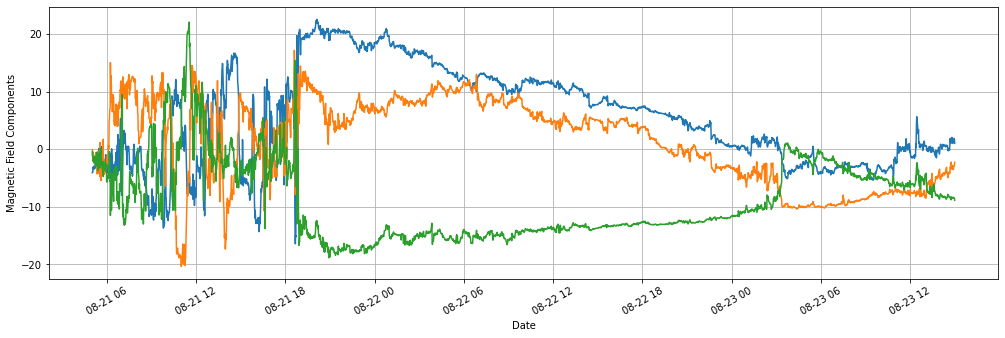

In [19]:
gg(2012, 7, 14, 17, 39,
   2012, 7, 17, 3, 21)

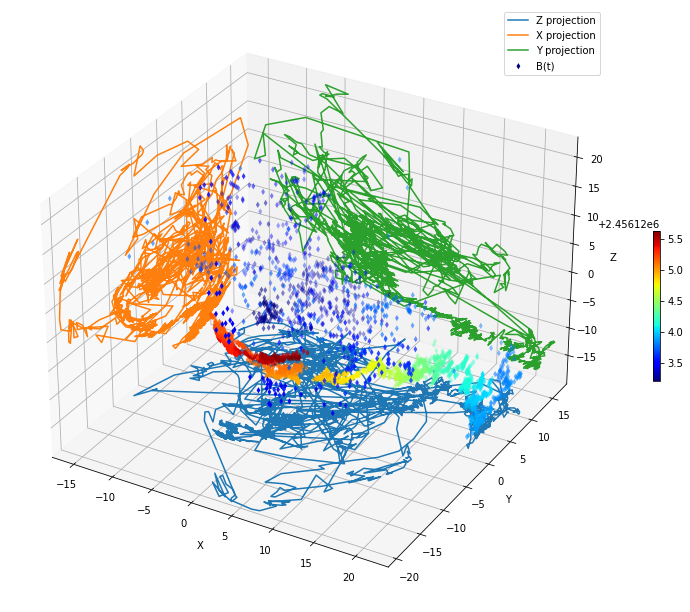

In [47]:
hh(2012, 7, 14, 17, 39,
   2012, 7, 17, 3, 21)

Attemping to create a function that creates a window for plotting a desired data interval

In [5]:
def f(x):
    return x

In [6]:
interact(f, x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f(x)>

In [28]:
def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '250px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [30]:
def g(init, interval):
    # min = 10404420
    # max = 10406460
    min_val = init
    max_val = min_val + interval
    T, BX, BY, BZ = (sav_data['datejul'][min_val:max_val], 
                     sav_data['bbxx'][min_val:max_val], 
                     sav_data['bbyy'][min_val:max_val], 
                     sav_data['bbzz'][min_val:max_val])

    fig, ax = plt.subplots(figsize=(17,5))
    plt.plot_date(T, BX, marker='', linestyle='-')
    plt.plot_date(T, BY, marker='', linestyle='-')
    plt.plot_date(T, BZ, marker='', linestyle='-')
    plt.grid()
    ax.xaxis.set_tick_params(rotation=30, labelsize=10)

In [31]:
interactive_plot = interactive(g, init = (0, len(sav_data['bbxx']), 1000), interval = (0, 13000, 100))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=5938000, description='init', max=11877120, step=1000), IntSlider(value=6…

In [34]:
def h(init, interval):
    min_val = init
    max_val= min_val + interval
    T, BX, BY, BZ = (sav_data['datejul'][min_val:max_val], 
                     sav_data['bbxx'][min_val:max_val], 
                     sav_data['bbyy'][min_val:max_val], 
                     sav_data['bbzz'][min_val:max_val])
    
    fig = plt.figure(figsize=(17,11))
    ax = fig.gca(projection='3d')

    x_plane = [BX.min() - 0.5] * len(BX)
    y_plane = [BY.max() + 0.5] * len(BY)
    z_plane = [BZ.min() - 0.5] * len(BZ)
    
    colorsMap='jet'
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(T), vmax=max(T))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

    ax.plot(BX, BY, z_plane, label = 'Z projection')
    ax.plot(x_plane, BY, BZ, label = 'X projection')
    ax.plot(BX, y_plane, BZ, label = 'Y projection')
    ax.scatter(BX, BY, BZ, c=scalarMap.to_rgba(T), label='B(t)', marker = 'd', linewidth = 0)

    ax.set_xlim(BX.min() - 0.5, BX.max() + 0.5)
    ax.set_ylim(BY.min() - 0.5, BY.max() + 0.5)
    ax.set_zlim(BZ.min() - 0.5, BZ.max() + 0.5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.legend();

Interval needed 10404420:10406460

In [35]:
interactive_plot = interactive(h, init = (0, len(sav_data['bbxx']), 1000), interval = (0, 3000, 100))
output = interactive_plot.children[-1]
output.layout.height = '650px'
interactive_plot

interactive(children=(IntSlider(value=5938000, description='init', max=11877120, step=1000), IntSlider(value=1…

## Past Attempts

In [34]:
sav_data['vvxx'][0:10] * sav_data['datejul'][0:10]data_dir = Path("OMNI/")
file = data_dir / "param.sav"
sav_data = readsav(file)

array([-9.22169476e+08, -9.22235808e+08, -9.22302140e+08, -9.22368471e+08,
       -9.22434803e+08, -9.22501135e+08, -9.22567466e+08, -9.22633798e+08,
       -9.22700130e+08, -9.22766462e+08])

In [39]:
data_dir_dst = Path("OMNI/")
file_dst = data_dir_dst / "dst.sav"
sav_data_dst = readsav(file_dst)

In [41]:
sav_data_dst.keys()

dict_keys(['julindex', 'dst'])

In [43]:
sav_data_dst['julindex'].shape

(206448,)

In [79]:
def plotting(a, min, max):
    # plt.figure(figsize=(17,5), dpi=100)
    fig = plt.plot_date(x = sav_data['datejul'][min:max], 
                  y = sav_data[a][min:max], 
                  marker='', 
                  linestyle='-', xdate = True)
    plt.rc('grid', linestyle=":", color='black')
    plt.grid()

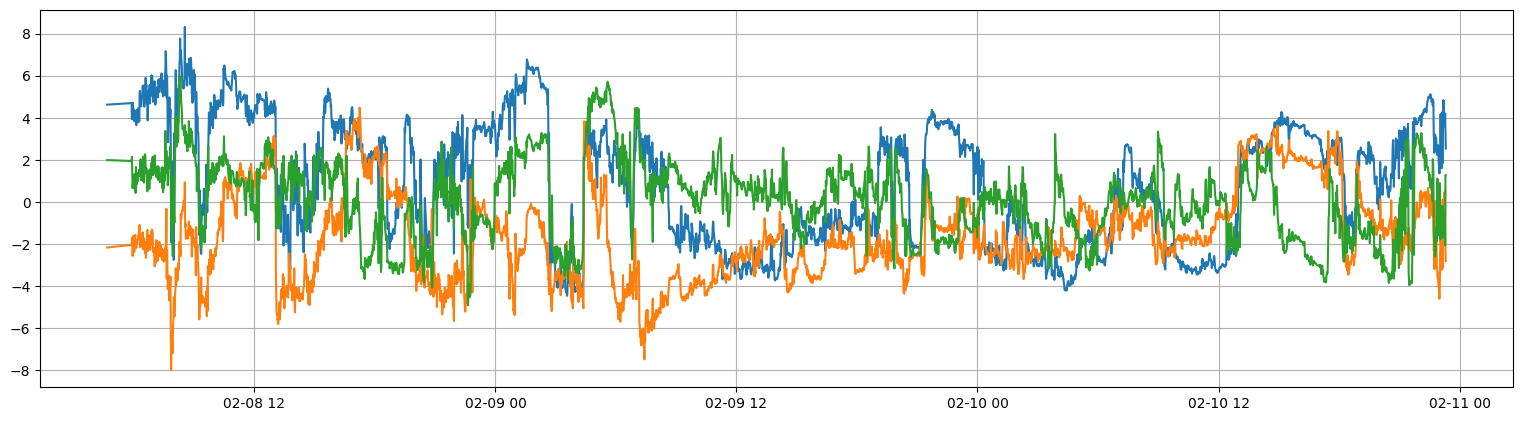

In [80]:
# min = 0
# max = len(sav_data['bbxx'])

min = 1000
interval = 5000
max = min + interval

plt.figure(figsize=(19,5), dpi=100)
plotting('bbxx', min, interval)
plotting('bbyy', min, interval)
plotting('bbzz', min, interval)

In [14]:
def point(pos):
    return (sav_data['bbxx'][pos], sav_data['bbyy'][pos], sav_data['bbzz'][pos])

In [15]:
point(7)

(3.6322398, -3.8469782, 2.5689487)

In [16]:
def plot3dMagneticField(min,max):
    fig = plt.figure(figsize=(17,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(sav_data['bbxx'][min:max], sav_data['bbyy'][min:max], sav_data['bbzz'][min:max], zdir='z')

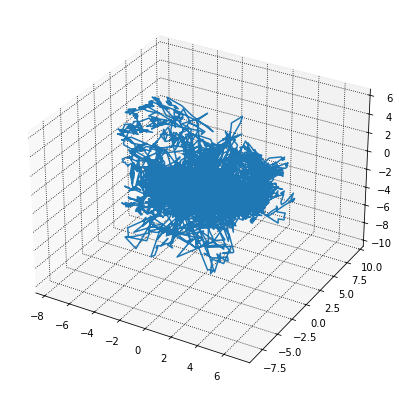

In [17]:
plot3dMagneticField(2500,10000)

In [18]:
def triContourMagField(min,max):
    plt.figure(figsize=(11,6))
    plt.tricontour(sav_data['bbxx'][min:max], sav_data['bbyy'][min:max], sav_data['bbzz'][min:max], levels=10)

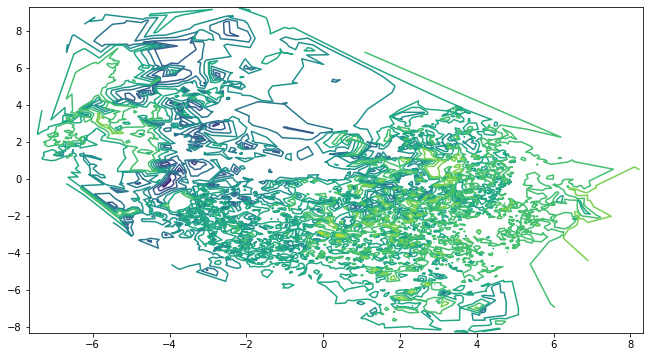

In [19]:
triContourMagField(1000,10000)

In [20]:
# Components of the magnetic field
bx = sav_data['bbxx']
by = sav_data['bbyy']
bz = sav_data['bbzz']
magnetic_field = np.sqrt(bx**2 + by**2 + bz**2)
rho = np.sqrt(bx**2 + by**2)

In [21]:
polar_angle = np.arcsin(rho / magnetic_field)
azimutal_angle = np.arcsin(bx / rho)

<ipython-input-21-9417aa1bf3c3>:2: RuntimeWarning: invalid value encountered in true_divide
  azimutal_angle = np.arcsin(bx / rho)


In [22]:
# There will be a problem with the angle evaluation fue to division over zero
# the arctan does not solve the problem because there is at least one cero in both bx and by
0 in rho

True

In [23]:
np.isnan(azimutal_angle.min())

True

In [24]:
azimutal_angle

array([ 0.75419325,  0.75455034,  0.7549075 , ..., -0.36301154,
       -0.45571125, -0.49493882], dtype=float32)

In [25]:
polar_angle[1080:2000] > 2 * np.pi;

In [26]:
all(i < np.pi for i in polar_angle[1080:])

True

In [27]:
angles_test = polar_angle[1080:1100]
angles_test

array([1.2942414, 1.3091052, 1.3821795, 1.2925435, 1.3601471, 1.4792185,
       1.2288599, 1.3825295, 1.3826674, 1.3036959, 1.3171105, 1.3649362,
       1.3267946, 1.245247 , 1.3139608, 1.2613419, 1.2107161, 1.3390396,
       1.2973688, 1.2706968], dtype=float32)

In [28]:
diff = angles_test[1:] - angles_test[:-1]
np.abs(np.sum(diff))

0.02354467

In [29]:
diffTotal = polar_angle[1:] - polar_angle[:-1]
np.sum(diffTotal)

-0.14309224

In [30]:
diffTotal.shape'

SyntaxError: EOL while scanning string literal (<ipython-input-30-ab58fc697c2f>, line 1)

In [ ]:
np.sum(polar_angle[1000:1010])

In [ ]:
polar_angle[15]

In [ ]:
a = 0
pi = np.pi
for angle in diffTotal[:]:
    a += np.sum(angle)
    if np.abs(a) > 2 * pi :
        print('it has a rotation')

In [ ]:
np.where(bx == 0)

In [ ]:
np.where(by == 0)